This notebook uses Velodrome with raw mutations and CNV data as input data.

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import os
import time
import torch
import random

In [4]:
from dataset import (
    AggCategoricalAnnotatedCellLineDataset,
    AggCategoricalAnnotatedPdxDataset,
    AggCategoricalAnnotatedTcgaDataset    
)

In [5]:
from VelodromeModel import VelodromeTestBedMutCNV

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.10979723528027535,
 'lr': 0.2028807525895536,
 'lr1': 0.42832593493163584,
 'lr2': 0.20909629627130924,
 'wd': 0.0015321156857535244,
 'wd1': 0.059937658449634904,
 'wd2': 0.04907255297526718,
 'bs': 36,
 'epoch': 70,
 'lam1': 0.2,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.8}

In [8]:
model_PACLITAXEL = VelodromeTestBedMutCNV('PACLITAXEL')
model_PACLITAXEL.train_model(best_parameters)


-------------------- PACLITAXEL --------------------
Cell-line dataset for training Predictor 1: (243, 648)
Cell-line dataset for training Predictor 2: (243, 648)
Total no. of cell-lines for training: 486
TCGA dataset for training both Predictors: (460, 648)
Total no. of cell-lines for evaluation: 122


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.3915411319099782


In [9]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,31,0.570652,0.814376,0.107149,0.566156,0.008668,0.963088


X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


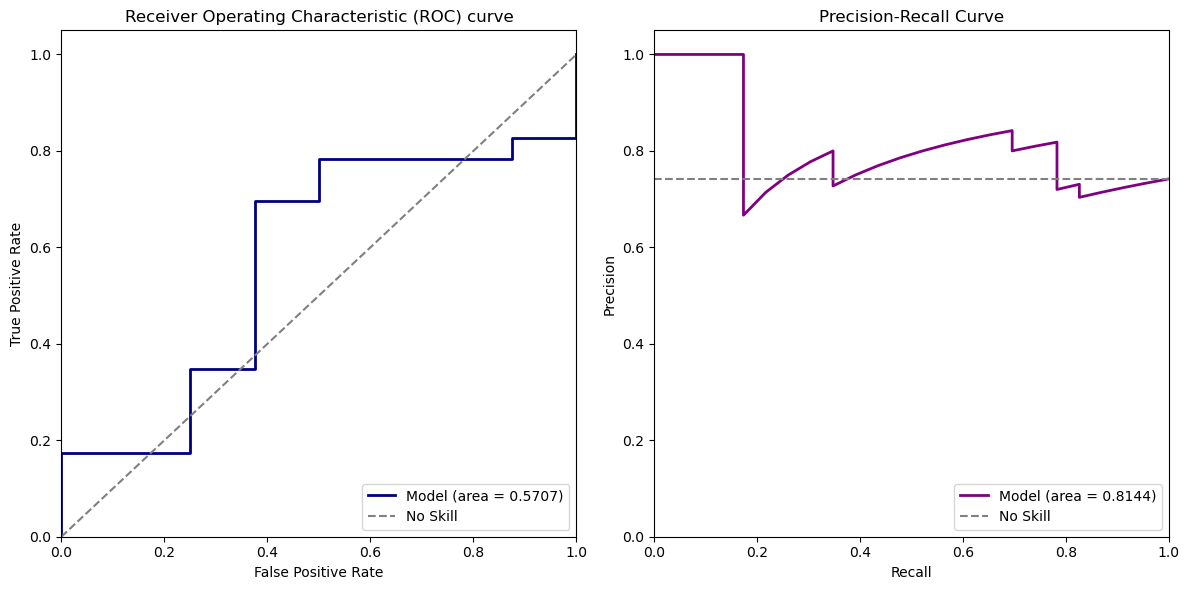

In [10]:
%matplotlib inline
model_PACLITAXEL.get_roc_pr_curves('PACLITAXEL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [11]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedPdxDataset(is_train=None, only_cat_one_drugs=True)) # only 1 class label in test split for each drug

X: (178, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


Dataset has only 1 class label for PACLITAXEL


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,8,NaN,-0.0,NaN,NaN,NaN,NaN


In [12]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,68,0.25935,0.032704,0.413175,0.000462


In [13]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,608,0.221219,3.548803e-08,0.26943,1.426951e-11


### CISPLATIN

In [14]:
best_parameters = {'ldr': 0.4936302324834783,
 'lr': 0.0026335446565979616,
 'lr1': 0.0029050122339904757,
 'lr2': 0.006112427635087397,
 'wd': 0.1,
 'wd1': 0.13966082949029565,
 'wd2': 0.14291465404478265,
 'lam1': 0.2,
 'bs': 65,
 'epoch': 40,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.8}

In [15]:
model_CISPLATIN = VelodromeTestBedMutCNV('CISPLATIN')
model_CISPLATIN.train_model(best_parameters)


-------------------- CISPLATIN --------------------
Cell-line dataset for training Predictor 1: (193, 648)
Cell-line dataset for training Predictor 2: (193, 648)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 648)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.39680286705843426


In [16]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,36,0.518519,0.814913,0.027789,0.87219,0.040942,0.812593


X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


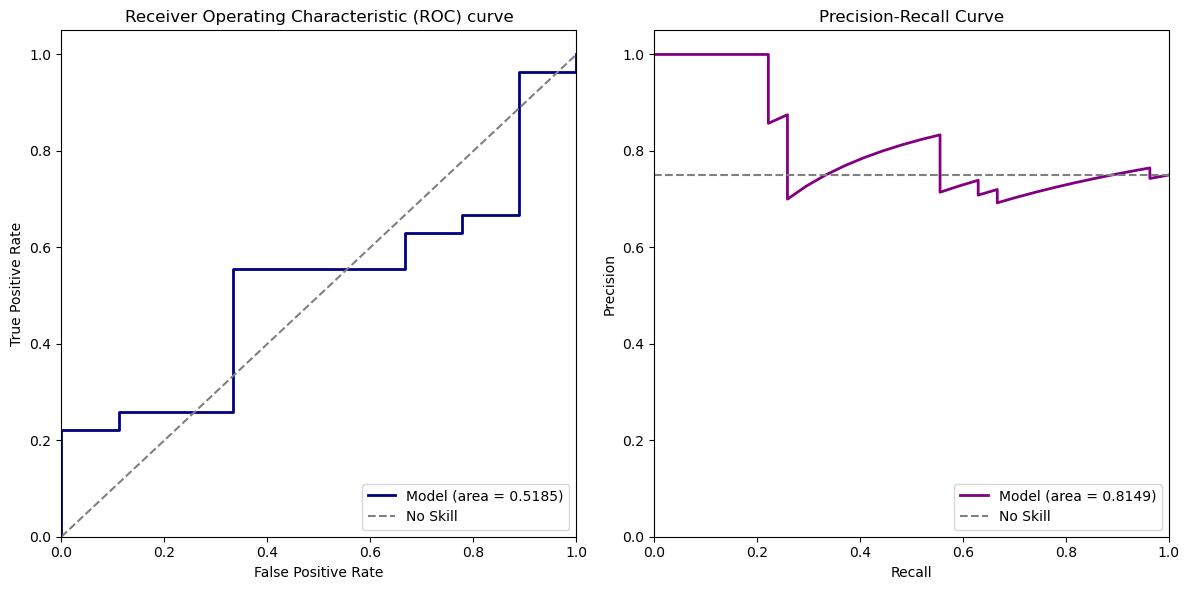

In [17]:
%matplotlib inline
model_CISPLATIN.get_roc_pr_curves('CISPLATIN', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [18]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,54,0.297351,0.028992,0.312552,0.021391


In [19]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,483,0.353553,1.145610e-15,0.380388,4.470203e-18


### 5-FLUOROURACIL

In [20]:
best_parameters = {'ldr': 0.35231256242157577,
 'lr': 0.00913077175900679,
 'lr1': 0.0057433852025299045,
 'lr2': 0.0016607477422395413,
 'wd': 0.2163852098183689,
 'wd1': 0.16560754622680685,
 'wd2': 0.148958768110298,
 'lam1': 0.4,
 'bs': 59,
 'epoch': 37,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.6}

In [21]:
model_5_FLUOROURACIL = VelodromeTestBedMutCNV('5-FLUOROURACIL')
model_5_FLUOROURACIL.train_model(best_parameters)


-------------------- 5-FLUOROURACIL --------------------
Cell-line dataset for training Predictor 1: (211, 648)
Cell-line dataset for training Predictor 2: (211, 648)
Total no. of cell-lines for training: 422
TCGA dataset for training both Predictors: (460, 648)
Total no. of cell-lines for evaluation: 106


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.2534581965878098


In [22]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,21,0.691176,0.906351,0.260347,0.25437,0.236741,0.301494


X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


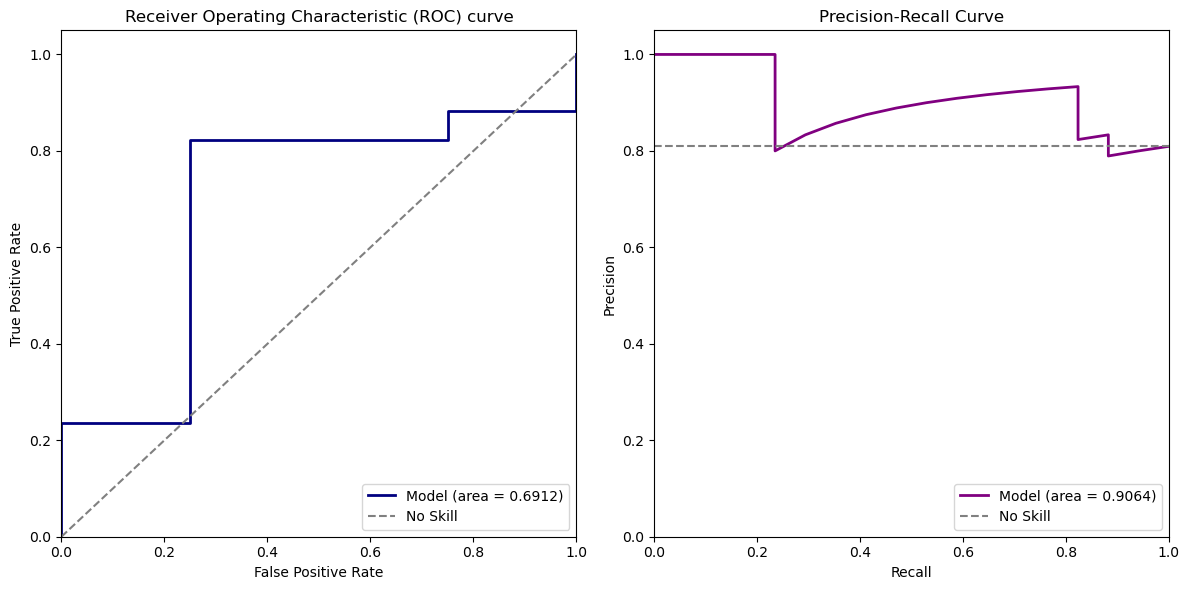

In [23]:
%matplotlib inline
model_5_FLUOROURACIL.get_roc_pr_curves('5-FLUOROURACIL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [24]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,61,0.001428,0.991287,0.067228,0.606701


In [25]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,528,0.23435,5.087299e-08,0.32439,2.107069e-14


### CYCLOPHOSPHAMIDE

In [26]:
best_parameters = {'ldr': 0.14527533992659303,
 'lr': 0.2731954574552365,
 'lr1': 0.4706582827176899,
 'lr2': 0.3438729131510481,
 'wd': 0.0060796212274581195,
 'wd1': 0.03301850587548688,
 'wd2': 0.03581677219020203,
 'lam1': 0.4,
 'bs': 57,
 'epoch': 66,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.6}

In [27]:
model_CYCLOPHOSPHAMIDE = VelodromeTestBedMutCNV('CYCLOPHOSPHAMIDE')
model_CYCLOPHOSPHAMIDE.train_model(best_parameters)


-------------------- CYCLOPHOSPHAMIDE --------------------
Cell-line dataset for training Predictor 1: (231, 648)
Cell-line dataset for training Predictor 2: (232, 648)
Total no. of cell-lines for training: 463
TCGA dataset for training both Predictors: (460, 648)
Total no. of cell-lines for evaluation: 116


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.3077042905599391


In [28]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,19,0.794118,0.97643,0.313112,0.191797,0.200958,0.409397


X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


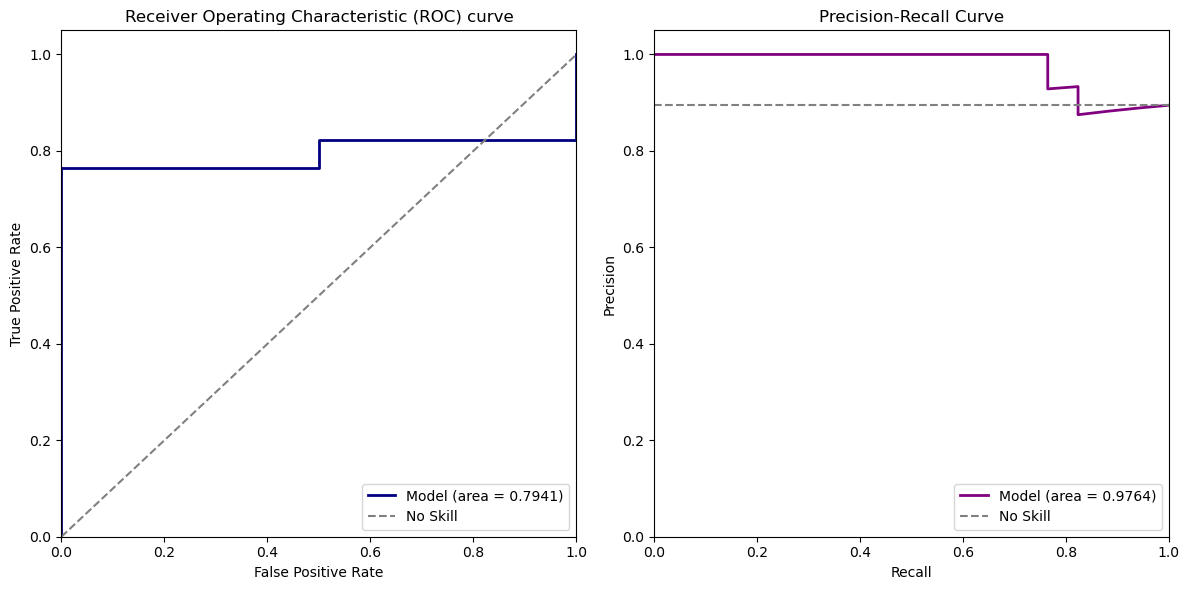

In [29]:
%matplotlib inline
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves('CYCLOPHOSPHAMIDE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [30]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,66,0.234777,0.057761,0.260125,0.034914


In [31]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,579,0.172271,0.000031,0.313624,1.109753e-14


### GEMCITABINE

In [32]:
best_parameters = {'ldr': 0.1,
 'lr': 0.01,
 'lr1': 0.005,
 'lr2': 0.05,
 'wd': 0.0001,
 'wd1': 0.005,
 'wd2': 0.01,
 'lam1': 0.005,
 'bs': 17,
 'hd': 2,
 'epoch': 10,
 'gpu': 0,
 'seed': 42}

In [33]:
model_GEMCITABINE = VelodromeTestBedMutCNV('GEMCITABINE')
model_GEMCITABINE.train_model(best_parameters)


-------------------- GEMCITABINE --------------------
Cell-line dataset for training Predictor 1: (193, 648)
Cell-line dataset for training Predictor 2: (193, 648)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 648)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: -0.15895388398185376


In [34]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,18,0.703704,0.757546,0.353371,0.150294,0.377986,0.121968


X: (4766, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


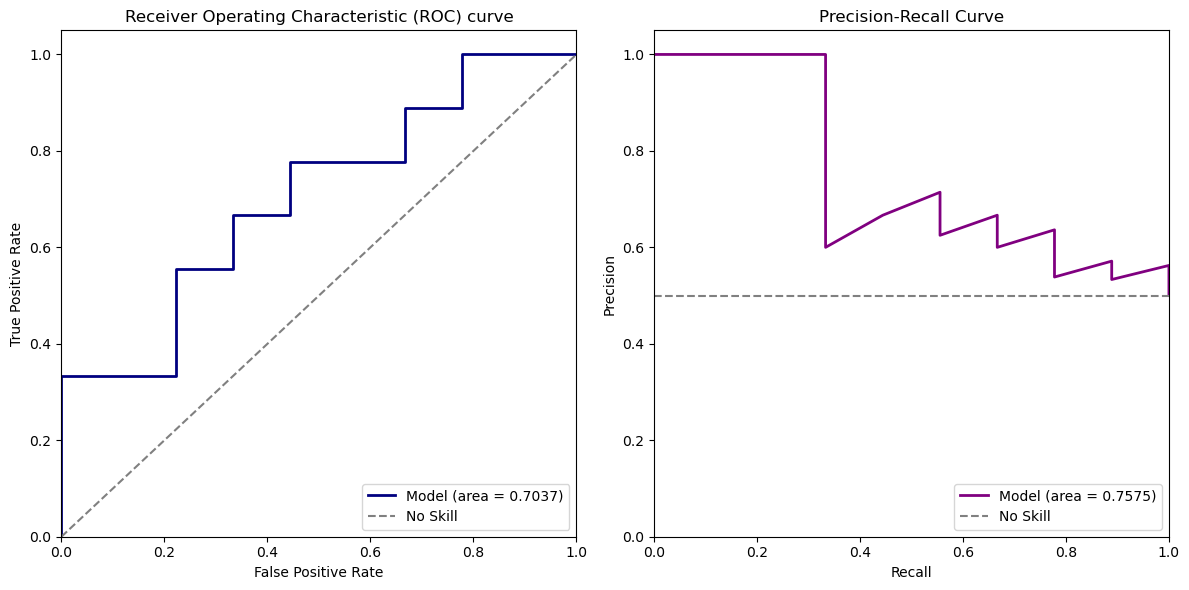

In [35]:
%matplotlib inline
model_GEMCITABINE.get_roc_pr_curves('GEMCITABINE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [36]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,54,-0.407204,0.002244,-0.295722,0.029926


In [37]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

X: (692, 648)


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:207: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,483,0.110364,0.01524,0.237973,1.205476e-07
